<a href="https://colab.research.google.com/github/kevin3302/Ford_Car_Price_Prediction/blob/main/DS_03_MLB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# 1. Take the data and create a data frame
df = pd.read_csv("/ford.csv")

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [ ]:
df.shape

(17966, 9)

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
# No - NULL Values or missing values

In [ ]:
# remove duplicates
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(17812, 9)

In [ ]:
# check for outliers
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,2016.862396,12269.556310,23381.146362,113.315012,57.908696,1.350623
std,2.052039,4736.285417,19419.011045,62.034603,10.132696,0.432581
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11288.000000,18277.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,31098.500000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
# using IQR to remove outliers
l = ['price', 'mileage', 'tax', 'mpg']
for i in l :
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    df = df[(df[i]>lower_bound)&(df[i]<upper_bound)]

In [ ]:
df.shape

(11856, 9)

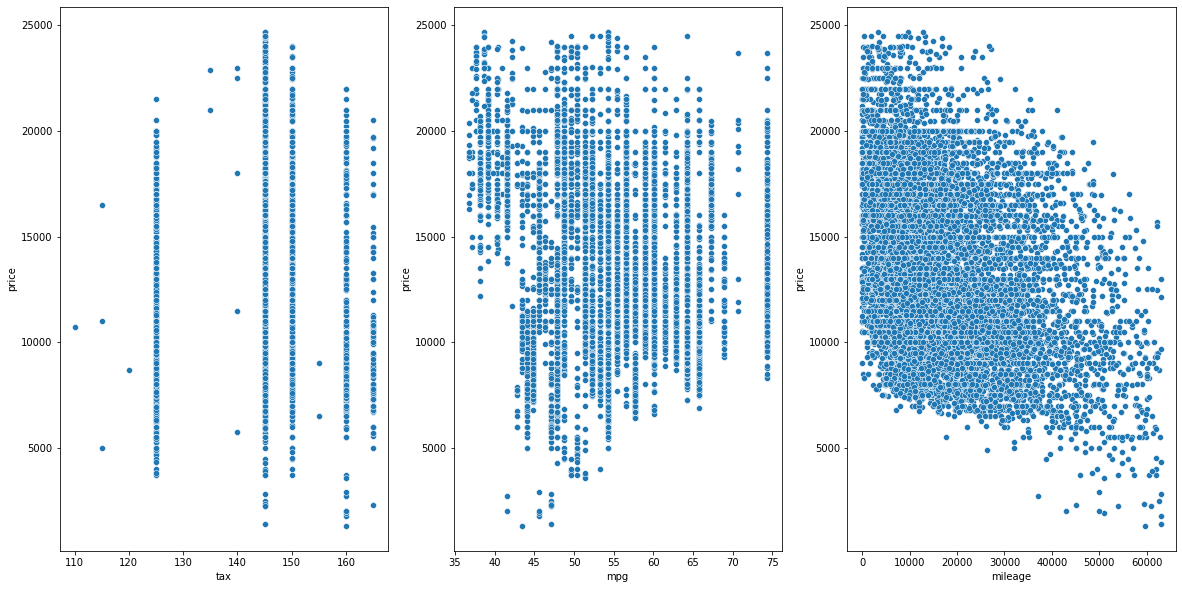

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.scatterplot(x=df.tax,y=df.price)

plt.subplot(1,3,2)
sns.scatterplot(x=df.mpg,y=df.price)

plt.subplot(1,3,3)
sns.scatterplot(x=df.mileage,y=df.price)

Text(0.5, 1.0, 'Spread Plot')

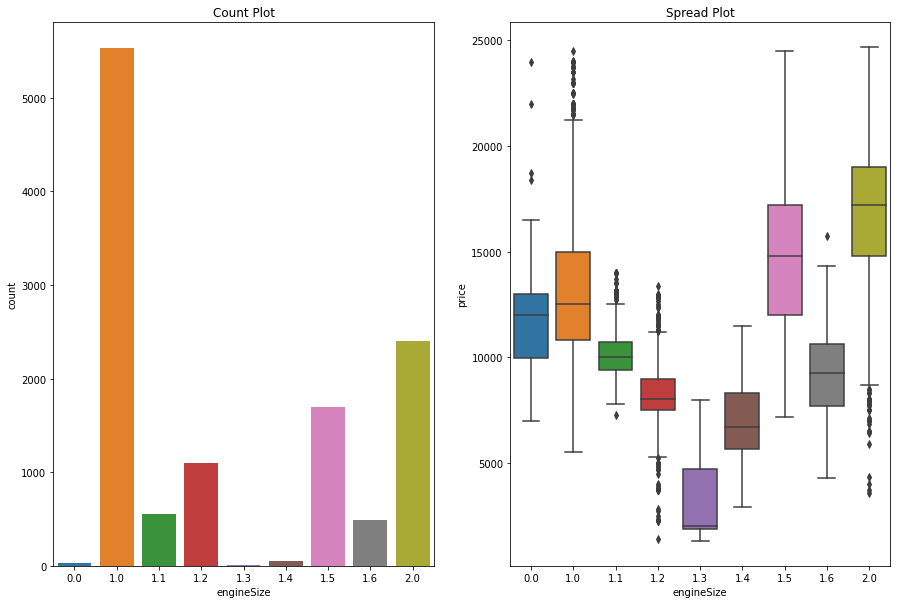

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.countplot(x=df.engineSize)
plt.title('Count Plot')
plt.subplot(1,2,2)
sns.boxplot(x=df.engineSize,y=df.price)
plt.title('Spread Plot')

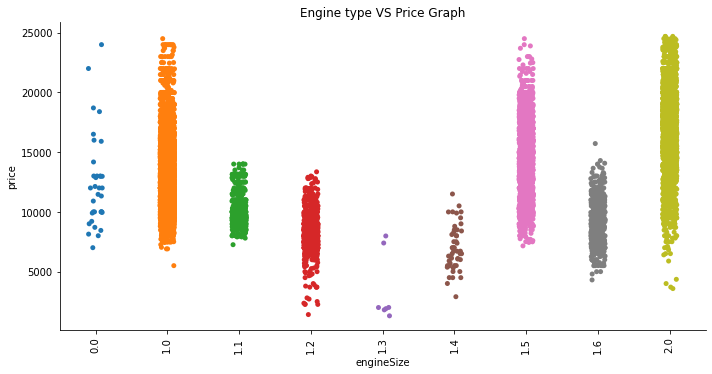

In [ ]:
# EngineSize and price column
sns.catplot(x='engineSize',y='price',data=df,height=5,aspect=2).set(title='Engine type VS Price Graph')
plt.xticks(rotation=90)
plt.show()

In [ ]:
dummies = pd.get_dummies(df.model)
dummies2 = pd.get_dummies(df.transmission)
dummies3 = pd.get_dummies(df.fuelType)

# Join new columns in one dataset
df2 = pd.concat([df,dummies,dummies2,dummies3],axis=1)

df2 = df2.drop(['model','transmission','fuelType'],axis=1)
df2.head()

#Using (df) as a default name for our dataset.
df = df2

In [ ]:
#Index Reseting
df = df.reset_index(drop=True)

In [ ]:
# Scaling
mms = MinMaxScaler()
inputs = ['year','price','mileage','tax','mpg','engineSize']
df[inputs] = mms.fit_transform(df[inputs])

In [ ]:
# Divide into i/p and o/p (x-i/p, y-o/p)
x = df.drop('price',axis=1)
y = df.price

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# training model
def model_train(x_train,y_train):
  all_models = [LinearRegression(),DecisionTreeRegressor()]
  scores = []
  for i in all_models:
    model = i
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_train)
    mse = mean_squared_error(y_train,y_predicted)
    mae = mean_absolute_error(y_train,y_predicted)
    scores.append({
        'model': i,
        'best_score':model.score(x_train,y_train),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })
  return pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

model_train(x_train,y_train)

,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.826215,0.004707,0.053433
1,DecisionTreeRegressor(),0.999526,0.000013,0.000367


In [ ]:
def model_test(x_test,y_test):
  all_models = [LinearRegression(),DecisionTreeRegressor()]
  scores = []
  for i in all_models:
    model = i
    model.fit(x_test,y_test)
    y_predicted = model.predict(x_test)
    mse = mean_squared_error(y_test,y_predicted)
    mae = mean_absolute_error(y_test,y_predicted)
    scores.append({
        'model': i,
        'best_score':model.score(x_test,y_test),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
        })
  return pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])


model_test(x_test,y_test)

,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.834187,0.004395,0.052141
1,DecisionTreeRegressor(),0.999886,0.000003,0.000121


Text(0, 0.5, 'Predicted')

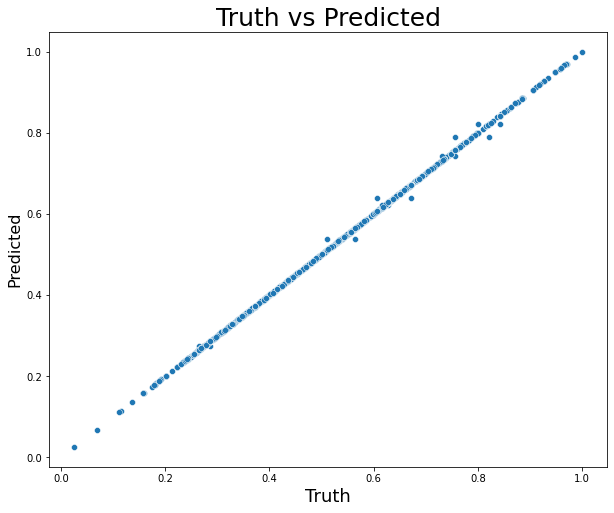

In [ ]:
# Decision tree is giving better accuracy
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_test,y_test)
y_predicted = model.predict(x_test)

plt.figure(figsize=(10,8))
plt.title('Truth vs Predicted',fontsize=25)
sns.scatterplot(x = y_test,y = y_predicted)      
plt.xlabel('Truth', fontsize=18)                          
plt.ylabel('Predicted', fontsize=16)